# 퍼셉트론 알아보기
---
퍼셉트론(Perceptron)이란, 고전적인 인공 신경망(Artificial Neural Network, ANN) 알고리즘입니다. 여러 입력을 받은 뒤, 하나의 결과를 반환하는 방식으로 동작하지요. 실제 신경세포의 동작(물론 극히 일부만)을 본따서 만들었다는 특징도 있고, 한번 사장되었던 기술을 현대 인공지능의 주류로 만들어 놓았다는 특징도 있는 재미있는 개념입니다. 이번에는 간단한 파이썬(Python) 코드로 퍼셉트론을 이용해서, 논리 회로를 구현하는 작업을 해 보겠습니다.
</p></br></br>

## 단층 퍼셉트론 구현하기
---
단층 퍼셉트론(Single Layer Perceptorn)이란, 입력과 출력의 단순한 구조로 구현한 퍼셉트론을 이릅니다. 이는 $y=wx+b$ 형태의 문제를 풀 수 있는 선형 분류기로 표현되지요. 풀 수 있는 문제가 단순한 만큼, 구현도 간편합니다. 아래 코드를 참조해서 단층 퍼셉트론으로 AND 게이트를 구현해 보도록 합시다.
</p></br></br>


예측 결과: [0 0 0 1]


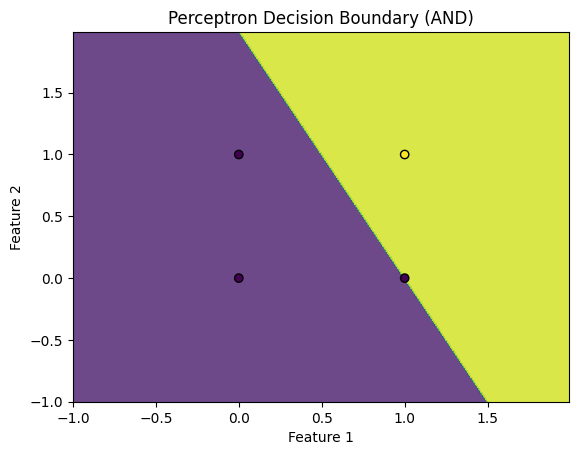

In [27]:
# Import Package
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=10):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iter):
            for idx, sample in enumerate(X):
                linear_output = np.dot(sample, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * sample
                self.bias += update

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary (AND)')
    plt.show()


# AND 게이트
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# 퍼셉트론 학습시키기
model = Perceptron(learning_rate=0.1, n_iter=10)
model.fit(X, y)

predictions = model.predict(X)  # 예측
print("예측 결과:", predictions)

plot_decision_boundary(X, y, model)  # 시각화

</p></br></br>

위와 같이, 단층 퍼셉트론으로 AND 게이트와 같은 판단을 할 수 있는 모델을 만들 수 있습니다. 이 모델의 경우, 시각적으로 표현하자면 (1, 1) 좌표에 해당하는 영역만 따로 분리할 수 있는 경계선을 그어서 두 영역을 구분할 수 있게 됩니다.
</p></br></br>

## 다층 퍼셉트론 구현하기
---
하지만, 이 세상에는 AND 게이트보다 복잡한 문제가 많이 있지요. 이를 해결하기 위해서는 더욱 복잡한 함수에 대응하는 알고리즘이 필요합니다. 퍼셉트론에서는, 이런 분제를 다층 퍼셉트론(Multi Layer Perceptorn, MLP)으로 해결했지요. 다층 퍼셉트론이란, 입력과 출력 사이에 은닉층이라고 하는 새로운 계층을 추가한 모델입니다. 이 때부터 해결할 수 있는 문제의 복잡도가 크게 늘어나는데요, MLP는 아래 수식과 같은 문제를 풀 수 있습니다.
</p></br></br>

$$ 
\mathbf{h}^{(1)} = \sigma(\mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}) 
$$
$$ 
\mathbf{h}^{(2)} = \sigma(\mathbf{W}^{(2)} \mathbf{h}^{(1)} + \mathbf{b}^{(2)}) 
$$
$$ 
\vdots 
$$
$$ 
\mathbf{h}^{(L-1)} = \sigma(\mathbf{W}^{(L-1)} \mathbf{h}^{(L-2)} + \mathbf{b}^{(L-1)}) 
$$
$$ 
\mathbf{y} = \sigma(\mathbf{W}^{(L)} \mathbf{h}^{(L-1)} + \mathbf{b}^{(L)}) 
$$

- **계층의 개수**: $L$
- **$n$번째 은닉층**: $ \mathbf{h}^{(n)} $
- **$n$번째 은닉층의 가중치**: $ \mathbf{W}^{(n)} $
- **$n$번째 은닉층의 편향**: $ \mathbf{b}^{(n)} $
- **활성화 함수**: $ \sigma $
</p></br></br>

이 시점부터 우리는 해당 퍼셉트론 모델을 딥러닝(Deep Learning) 모델이라고 부르지요. 아래 코드는 단층 퍼셉트론으로는 해결할 수 없는 XOR 게이트를 파이썬 텐서플로우(TensorFlow) 라이브러리를 이용해서 MLP로 구현하는 코드입니다.
</p></br></br>


1/1 [==============================] - 0s 41ms/step
예측 결과:
 [[0]
 [1]
 [1]
 [0]]
2813/2813 [==============================] - 2s 734us/step


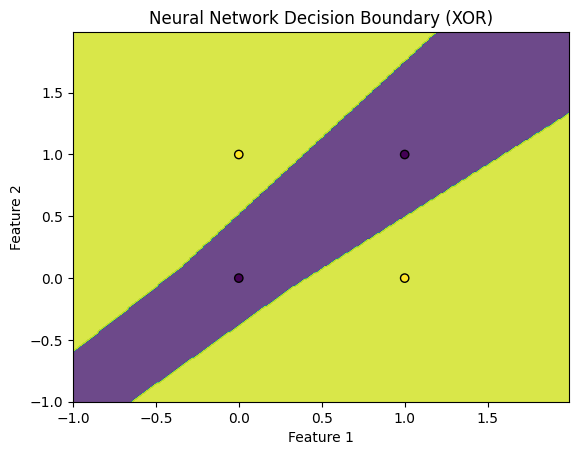

In [33]:
# Import Package
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Neural Network Decision Boundary (XOR)')
    plt.show()
    

# XOR 게이트
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# MLP 모델 정의
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # 입력층
model.add(Dense(4, activation='relu'))  # 은닉층
model.add(Dense(1, activation='sigmoid'))  # 출력층
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # 컴파일

model.fit(X, y, epochs=2000, verbose=0)  # 다층 퍼셉트론 학습시키기

predictions = model.predict(X)  # 예측
predictions = (predictions > 0.5).astype(int)  # 이진 데이터로 변환
print("예측 결과:\n", predictions)

plot_decision_boundary(model, X, y)  # 시각화

</p></br></br>

위 결과와 같이, 다층 퍼셉트론으로는 XOR 게이트와 같은 조금 더 복잡한 판단을 할 수 있는 모델을 만들 수 있습니다. 시각적으로 표현하자면 (0, 0)과 (1, 1) 좌표에 해당하는 영역만 따로 분리할 수 있는 경계선을 그어서 두 영역을 구분할 수 있게 됩니다. 이 경계선은 직선 하나로만 표현할 수 없기 때문에, 단층 퍼셉트론으로는 불가능한 분류 작업이지요.